In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("C:\\Users\\deeks\\Documents\\PhD\\PHD_TrainData_and_ProblemStatement-1558070454703\\PHD_TrainData_and_ProblemStatement")

In [3]:
train_data=pd.read_excel("Train.xlsx",header=0)
test_data=pd.read_excel("Test.xlsx",header=0)

In [4]:
train_data.head()

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
0,Rep10101,C21116,PR6112,182,1665,indeterminate
1,Rep10102,C21116,PR6112,182,1740,indeterminate
2,Rep10103,C21116,PR6253,101,1040,indeterminate
3,Rep10104,C21116,PR6253,283,4495,No
4,Rep10105,C21116,PR6294,108,1465,indeterminate


In [5]:
test_data.isnull().sum()

ReportID           0
SalesPersonID      0
ProductID          0
Quantity           0
TotalSalesValue    0
dtype: int64

In [6]:
train_data.describe(include='all')

,ReportID,SalesPersonID,ProductID,Quantity,TotalSalesValue,Suspicious
count,42582,42582,42582,4.258200e+04,4.258200e+04,42582
unique,42582,992,593,NaN,NaN,3
top,Rep13814,C21976,PR6253,NaN,NaN,indeterminate
freq,1,1359,2590,NaN,NaN,39846
mean,NaN,NaN,NaN,4.910048e+03,1.620923e+04,NaN
std,NaN,NaN,NaN,9.833621e+04,5.997195e+04,NaN
min,NaN,NaN,NaN,3.300000e+01,5.980000e+02,NaN
25%,NaN,NaN,NaN,1.110000e+02,1.345000e+03,NaN
50%,NaN,NaN,NaN,2.060000e+02,2.980000e+03,NaN
75%,NaN,NaN,NaN,1.136000e+03,1.076500e+04,NaN


In [7]:
print(train_data.ProductID.unique().shape)
print(train_data.SalesPersonID.unique().shape)
print(train_data.ReportID.unique().shape)

(593,)
(992,)
(42582,)


In [8]:
100*train_data.Suspicious.value_counts()/len(train_data.Suspicious)

indeterminate    93.574750
No                6.000188
Yes               0.425062
Name: Suspicious, dtype: float64

In [9]:
y = train_data["Suspicious"]
X = train_data.drop('Suspicious', axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [11]:
X_train['Price_of_oneProduct'] = X_train.apply(lambda row: row.TotalSalesValue / row.Quantity, axis = 1)
X_test['Price_of_oneProduct'] = X_test.apply(lambda row: row.TotalSalesValue / row.Quantity, axis = 1)

In [12]:
X_train_df=X_train.groupby(["ProductID"]).median()
X_test_df=X_test.groupby(["ProductID"]).median()

In [13]:
X_train_df=X_train_df.drop(['TotalSalesValue','Quantity'],axis = 1)
X_test_df=X_test_df.drop(['TotalSalesValue','Quantity'],axis = 1)

In [14]:
X_train_df=X_train_df.rename(columns={'Price_of_oneProduct': 'Avg_of_eachProduct'})
X_test_df=X_test_df.rename(columns={'Price_of_oneProduct': 'Avg_of_eachProduct'})

In [15]:
X_train_updated = X_train.join(X_train_df, on='ProductID')
X_test_updated = X_test.join(X_test_df, on='ProductID')

X_train_data1 = X_train_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
X_train_data1 = X_train_data1.rename(columns={'TotalSalesValue': 'Average sales per person'})
X_train_updated = X_train_updated.join(X_train_data1,on = ['SalesPersonID'])

X_test_data1 = X_test_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
X_test_data1 = X_test_data1.rename(columns={'TotalSalesValue': 'Average sales per person'})
X_test_updated = X_test_updated.join(X_test_data1,on = ['SalesPersonID'])

In [16]:
print(X_train_updated.shape)
print(X_test_updated.shape)

(34065, 7)
(8517, 7)


X_train_data2 = X_train_updated.groupby(['SalesPersonID'])[['Quantity']].mean()
X_train_data2 = X_train_data2.rename(columns={'Quantity': 'Average amount Quantity per Person'})
X_train_updated = X_train_updated.join(X_train_data2,on=['SalesPersonID'])

X_test_data2 = X_test_updated.groupby(['SalesPersonID'])[['Quantity']].mean()
X_test_data2 = X_test_data2.rename(columns={'Quantity': 'Average amount Quantity per Person'})
X_test_updated = X_test_updated.join(X_test_data2,on=['SalesPersonID'])

X_train_data3 = X_train_updated.groupby(['SalesPersonID'])[['ProductID']].count()
X_train_data3 = X_train_data3.rename(columns={'ProductID': 'No of products per person'})
X_train_updated = X_train_updated.join(X_train_data3,on=['SalesPersonID'])

X_test_data3 = X_test_updated.groupby(['SalesPersonID'])[['ProductID']].count()
X_test_data3 = X_test_data3.rename(columns={'ProductID': 'No of products per person'})
X_test_updated = X_test_updated.join(X_test_data3,on=['SalesPersonID'])

X_train_data4 = X_train_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
X_train_data4=X_train_data4.rename(columns={'Quantity': 'sum of each product quuantity per person'})
X_train_updated = X_train_updated.join(X_train_data4,on=['SalesPersonID','ProductID'])

X_test_data4 = X_test_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
X_test_data4=X_test_data4.rename(columns={'Quantity': 'sum of each product quuantity per person'})
X_test_updated = X_test_updated.join(X_test_data4,on=['SalesPersonID','ProductID'])

X_train_data5 = X_train_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
X_train_data5 =X_train_data5.rename(columns={'TotalSalesValue': 'sum of each product sales per person'})
X_train_updated = X_train_updated.join(X_train_data5,on=['SalesPersonID','ProductID'])

X_test_data5 = X_test_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
X_test_data5 =X_test_data5.rename(columns={'TotalSalesValue': 'sum of each product sales per person'})
X_test_updated = X_test_updated.join(X_test_data5,on=['SalesPersonID','ProductID'])

X_train_data6 = X_train_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].median()
X_train_data6 =X_train_data6.rename(columns={'TotalSalesValue': 'Avg of each product sales per person'})
X_train_updated = X_train_updated.join(X_train_data6,on=['SalesPersonID','ProductID'])

X_test_data6 = X_test_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].median()
X_test_data6 =X_test_data6.rename(columns={'TotalSalesValue': 'Avg of each product sales per person'})
X_test_updated = X_test_updated.join(X_test_data6,on=['SalesPersonID','ProductID'])

X_train_data7 = X_train_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].mean()
X_train_data7 =X_train_data7.rename(columns={'Quantity': 'Avg of each product quuantity per person'})
X_train_updated = X_train_updated.join(X_train_data7,on=['SalesPersonID','ProductID'])

X_test_data7 = X_test_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].mean()
X_test_data7 =X_test_data7.rename(columns={'Quantity': 'Avg of each product quuantity per person'})
X_test_updated = X_test_updated.join(X_test_data7,on=['SalesPersonID','ProductID'])

X_train_data8=X_train_updated.groupby(['ProductID'])[['Quantity']].mean()
X_train_data8 = X_train_data8.rename(columns={'Quantity': 'Average amount Quantity per Product'})
X_train_updated = X_train_updated.join(X_train_data8,on=['ProductID'])

X_test_data8=X_test_updated.groupby(['ProductID'])[['Quantity']].mean()
X_test_data8 = X_test_data8.rename(columns={'Quantity': 'Average amount Quantity per Product'})
X_test_updated = X_test_updated.join(X_test_data8,on=['ProductID'])

X_train_data9=X_train_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
X_train_data9 = X_train_data9.rename(columns={'TotalSalesValue': 'Average sales per Product'})
X_train_updated = X_train_updated.join(X_train_data9,on=['ProductID'])

X_test_data9=X_test_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
X_test_data9 = X_test_data9.rename(columns={'TotalSalesValue': 'Average sales per Product'})
X_test_updated = X_test_updated.join(X_test_data9,on=['ProductID'])

X_train_data10=X_train_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
X_train_data10 = X_train_data10.rename(columns={'TotalSalesValue': 'Average salesvalue per Product'})
X_train_updated = X_train_updated.join(X_train_data10,on=['ProductID'])

X_test_data10=X_test_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
X_test_data10 = X_test_data10.rename(columns={'TotalSalesValue': 'Average salesvalue per Product'})
X_test_updated = X_test_updated.join(X_test_data10,on=['ProductID'])

X_train_data11 = X_train_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
X_train_data11 = X_train_data11.rename(columns={'TotalSalesValue': 'Average salesvalue per Person'})
X_train_updated = X_train_updated.join(X_train_data11,on=['SalesPersonID'])

X_test_data11 = X_test_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
X_test_data11 = X_test_data11.rename(columns={'TotalSalesValue': 'Average salesvalue per Person'})
X_test_updated = X_test_updated.join(X_test_data11,on=['SalesPersonID'])

X_train_updated['ratio for quantity per person'] = X_train_updated['Quantity']/X_train_updated['Average amount Quantity per Person']
X_test_updated['ratio for quantity per person'] = X_test_updated['Quantity']/X_test_updated['Average amount Quantity per Person']

X_train_updated['ratio for salesvalue per person'] = X_train_updated['TotalSalesValue']/X_train_updated['Average salesvalue per Person']
X_test_updated['ratio for salesvalue per person'] = X_test_updated['TotalSalesValue']/X_test_updated['Average salesvalue per Person']

In [17]:
test_data['Price_of_oneProduct'] = test_data.apply(lambda row: row.TotalSalesValue / row.Quantity, axis = 1)

In [18]:
test_df=test_data.groupby(["ProductID"]).median()
test_df=test_df.drop(['TotalSalesValue','Quantity'],axis = 1)
test_df=test_df.rename(columns={'Price_of_oneProduct': 'Avg_of_eachProduct'})
test_data_updated = test_data.join(test_df, on='ProductID')

test_data1 = test_data_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
test_data1 = test_data1.rename(columns={'TotalSalesValue': 'Average sales per person'})
test_data_updated = test_data_updated.join(test_data1,on = ['SalesPersonID'])

test_data2 = test_data_updated.groupby(['SalesPersonID'])[['Quantity']].mean()
test_data2 = test_data2.rename(columns={'Quantity': 'Average amount Quantity per Person'})
test_data_updated = test_data_updated.join(test_data2,on=['SalesPersonID'])

test_data3 = test_data_updated.groupby(['SalesPersonID'])[['ProductID']].count()
test_data3 = test_data3.rename(columns={'ProductID': 'No of products per person'})
test_data_updated = test_data_updated.join(test_data3,on=['SalesPersonID'])

test_data4 = test_data_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].sum()
test_data4=test_data4.rename(columns={'Quantity': 'sum of each product quuantity per person'})
test_data_updated = test_data_updated.join(test_data4,on=['SalesPersonID','ProductID'])

test_data5 = test_data_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].sum()
test_data5 =test_data5.rename(columns={'TotalSalesValue': 'sum of each product sales per person'})
test_data_updated = test_data_updated.join(test_data5,on=['SalesPersonID','ProductID'])

test_data6 = test_data_updated.groupby(['SalesPersonID','ProductID'])[['TotalSalesValue']].median()
test_data6 =test_data6.rename(columns={'TotalSalesValue': 'Avg of each product sales per person'})
test_data_updated = test_data_updated.join(test_data6,on=['SalesPersonID','ProductID'])

test_data7 = test_data_updated.groupby(['SalesPersonID','ProductID'])[['Quantity']].mean()
test_data7 =test_data7.rename(columns={'Quantity': 'Avg of each product quuantity per person'})
test_data_updated = test_data_updated.join(test_data7,on=['SalesPersonID','ProductID'])

test_data8 = test_data_updated.groupby(['ProductID'])[['Quantity']].mean()
test_data8 = test_data8.rename(columns={'Quantity': 'Average amount Quantity per Product'})
test_data_updated = test_data_updated.join(test_data8,on=['ProductID'])

test_data9=test_data_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
test_data9 = test_data9.rename(columns={'TotalSalesValue': 'Average sales per Product'})
test_data_updated = test_data_updated.join(test_data9,on=['ProductID'])

test_data10 = test_data_updated.groupby(['ProductID'])[['TotalSalesValue']].median()
test_data10 = test_data10.rename(columns={'TotalSalesValue': 'Average salesvalue per Product'})
test_data_updated = test_data_updated.join(test_data10,on=['ProductID'])

test_data11 = test_data_updated.groupby(['SalesPersonID'])[['TotalSalesValue']].median()
test_data11 = test_data11.rename(columns={'TotalSalesValue': 'Average salesvalue per Person'})
test_data_updated = test_data_updated.join(test_data11,on=['SalesPersonID'])

test_data_updated['ratio for quantity per person'] = test_data_updated['Quantity']/test_data_updated['Average amount Quantity per Person']

test_data_updated['ratio for salesvalue per person'] = test_data_updated['TotalSalesValue']/test_data_updated['Average salesvalue per Person']

In [19]:
print(X_train_updated.shape)
print(X_test_updated.shape)
print(test_data_updated.shape)

(34065, 7)
(8517, 7)
(9135, 7)


In [20]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [21]:
y_train=y_train.Suspicious.replace(['Yes','No','indeterminate'],['1','2','3'])
y_test=y_test.Suspicious.replace(['Yes','No','indeterminate'],['1','2','3'])

In [22]:
X_train_updated=X_train_updated.drop(['ReportID', 'SalesPersonID', 'ProductID'],axis=1)
X_test_updated=X_test_updated.drop(['ReportID', 'SalesPersonID', 'ProductID'],axis=1)
test_data_updated=test_data_updated.drop(['ReportID', 'SalesPersonID', 'ProductID'],axis=1)

In [23]:
test_data_updated.head()

,Quantity,TotalSalesValue,Price_of_oneProduct,Avg_of_eachProduct
0,102,1115,10.931373,9.437500
1,102,1050,10.294118,10.869565
2,344,3490,10.145349,10.849359
3,108,1095,10.138889,15.594714
4,146,1055,7.226027,9.501085


In [24]:
train_updated=X_train_updated.join(y_train)
test_updated=X_test_updated.join(y_test)

X_train_updated=X_train_updated.drop(['ReportID', 'SalesPersonID', 'ProductID','Average sales per person','Average amount Quantity per Person','sum of each product quuantity per person'],axis=1)
X_test_updated=X_test_updated.drop(['ReportID', 'SalesPersonID', 'ProductID','Average sales per person','Average amount Quantity per Person','sum of each product quuantity per person'],axis=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_updated = sc.fit_transform(X_train_updated)
X_test_updated = sc.transform(X_test_updated)
test_data_updated=sc.transform(test_data_updated)

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1) 
param_grid = {"criterion": ["gini", "entropy"],
              "max_features": [2,3,4,5,6,7,8,9,10,11,12,13,14],
              "n_estimators":[100,200,300,400,500,600,700,800,900,1000],
              "min_samples_leaf":[1,3,5],
              "max_depth": [2,5,7,9,11,13],
              }
scores = ['precision', 'recall']

clf = RandomForestClassifier(n_jobs=-1,class_weight="balanced",random_state=42)
rf = GridSearchCV(clf, param_grid, cv=10)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {"criterion": ["gini", "entropy"],
              "n_estimators":[300,400,600,700],
              "min_samples_leaf":[1,3,5],
              "max_depth": [2,5,7],
              }

clf = RandomForestClassifier(max_features='sqrt',class_weight="balanced",n_jobs=-1) 
rf= GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(criterion='gini', n_estimators=450, max_features=2, class_weight="balanced", max_depth=4)

In [26]:
rf_1=rf.fit(X_train_updated,y_train)

print (rf.best_score_, rf.best_params_) 

In [27]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=250,gamma=0.8,learning_rate=0.2,max_depth=2)

In [28]:
xgb.fit(X_train_updated,y_train);

In [29]:
pred_train_xgb=xgb.predict(X_train_updated)
pred_test_xgb=xgb.predict(X_test_updated)

rf.best_params_

In [30]:
pred_train_rf=rf.predict(X_train_updated)
pred_test_rf=rf.predict(X_test_updated)

In [31]:
from sklearn.metrics import confusion_matrix
cm_train_rf=confusion_matrix(pred_train_rf,y_train)
cm_test_rf=confusion_matrix(pred_test_rf,y_test)
print("confusion matrix for Random Forest Model")
print(cm_train_rf)
print(cm_test_rf)

confusion matrix for Random Forest Model
[[  117    25   237]
 [   12  1330  8257]
 [   16   689 23382]]
[[  21    2   66]
 [   6  296 2001]
 [   9  213 5903]]


In [32]:
cm_train_xgb=confusion_matrix(pred_train_xgb,y_train)
cm_test_xgb=confusion_matrix(pred_test_xgb,y_test)
print("confusion matrix for XG Boost Model")
print(cm_train_xgb)
print(cm_test_xgb)

confusion matrix for XG Boost Model
[[   90     3    10]
 [    4   315    70]
 [   51  1726 31796]]
[[  10    0    5]
 [   2   20   42]
 [  24  491 7923]]


In [33]:
from sklearn.metrics import classification_report
print("classification Report for Random Forest Model")
print(classification_report(y_train,pred_train_rf))
print(classification_report(y_test,pred_test_rf))

classification Report for Random Forest Model
              precision    recall  f1-score   support

           1       0.31      0.81      0.45       145
           2       0.14      0.65      0.23      2044
           3       0.97      0.73      0.84     31876

   micro avg       0.73      0.73      0.73     34065
   macro avg       0.47      0.73      0.50     34065
weighted avg       0.92      0.73      0.80     34065

              precision    recall  f1-score   support

           1       0.24      0.58      0.34        36
           2       0.13      0.58      0.21       511
           3       0.96      0.74      0.84      7970

   micro avg       0.73      0.73      0.73      8517
   macro avg       0.44      0.63      0.46      8517
weighted avg       0.91      0.73      0.80      8517



In [34]:
print("Classification Report of XG Boost Model")
print(classification_report(y_train,pred_train_xgb))
print(classification_report(y_test,pred_test_xgb))

Classification Report of XG Boost Model
              precision    recall  f1-score   support

           1       0.87      0.62      0.73       145
           2       0.81      0.15      0.26      2044
           3       0.95      1.00      0.97     31876

   micro avg       0.95      0.95      0.95     34065
   macro avg       0.88      0.59      0.65     34065
weighted avg       0.94      0.95      0.93     34065

              precision    recall  f1-score   support

           1       0.67      0.28      0.39        36
           2       0.31      0.04      0.07       511
           3       0.94      0.99      0.97      7970

   micro avg       0.93      0.93      0.93      8517
   macro avg       0.64      0.44      0.48      8517
weighted avg       0.90      0.93      0.91      8517



In [35]:
test_pred_rf = rf.predict(test_data_updated)

In [36]:
test_pred_xgb=xgb.predict(test_data_updated)

test_pred_rf=pd.DataFrame(test_pred_rf)

In [37]:
features = X_train_updated.columns
importances_rf = rf.feature_importances_
importances_xgb=xgb.feature_importances_
indices_rf = np.argsort(importances_rf)
indices_xgb=np.argsort(importances_xgb)

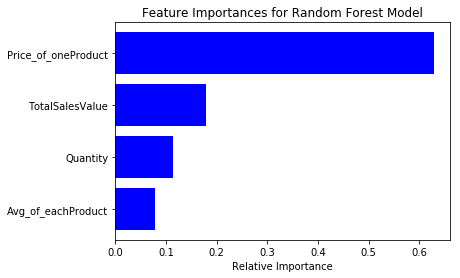

In [38]:
plt.title('Feature Importances for Random Forest Model')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

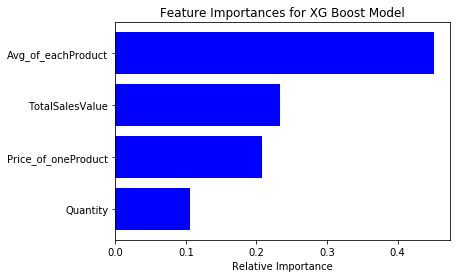

In [39]:
plt.title('Feature Importances for XG Boost Model')
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], color='b', align='center')
plt.yticks(range(len(indices_xgb)), [features[i] for i in indices_xgb])
plt.xlabel('Relative Importance')
plt.show()

In [40]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Input

Using TensorFlow backend.


In [41]:
encoding_dim=10
actual_dim=X_train_updated.shape[1]

In [42]:
input=Input(shape=(actual_dim,))
encoded=Dense(encoding_dim,activation='relu')(input)
decoded=Dense(actual_dim,activation='relu')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


In [43]:
from keras.models import Model
autoencoder=Model(input,decoded)

In [44]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 94
Trainable params: 94
Non-trainable params: 0
_________________________________________________________________


In [45]:
autoencoder.compile(optimizer='adam',loss='categorical_crossentropy')

In [46]:
autoencoder.fit(X_train_updated,X_train_updated,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
34065/34065 [==============================] - 1s 36us/step - loss: 17791.2197
Epoch 2/20
34065/34065 [==============================] - 1s 40us/step - loss: 8484.7262
Epoch 3/20
34065/34065 [==============================] - 1s 30us/step - loss: 8422.6866
Epoch 4/20
34065/34065 [==============================] - 1s 35us/step - loss: 8452.6843
Epoch 5/20
34065/34065 [==============================] - 1s 34us/step - loss: 8420.6945
Epoch 6/20
34065/34065 [==============================] - 1s 33us/step - loss: 8422.9286
Epoch 7/20
34065/34065 [==============================] - 1s 37us/step - loss: 8418.3091
Epoch 8/20
34065/34065 [==============================] - 1s 37us/step - loss: 8419.0553
Epoch 9/20
34065/34065 [==============================] - 1s 39us/step - loss: 8417.2946
Epoch 10/20
34065/34065 [==============================] - 1s 42us/step - loss: 8385.1425
Epoch 11/20
34065/34065 [==============================] - 2

In [47]:
encoder = Model(input,encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [48]:
X_train_nonlinear_features = encoder.predict(X_train_updated)
X_test_nonlinear_features = encoder.predict(X_test_updated)
test_data_updated_nonlinear=encoder.predict(test_data_updated)

In [49]:
X_train_updated_ae = np.concatenate((X_train_updated, X_train_nonlinear_features), axis=1)
X_test_updated_ae = np.concatenate((X_test_updated, X_test_nonlinear_features), axis=1)
test_data_updated_ae= np.concatenate((test_data_updated, test_data_updated_nonlinear), axis=1)

In [50]:
X_train_updated_ae.shape

(34065, 14)

In [51]:
ranf=rf.fit(X_train_updated_ae,y_train)

In [52]:
pred_train_rf_ae= rf.predict(X_train_updated_ae)
pred_test_rf_ae= rf.predict(X_test_updated_ae)

In [53]:
cm_train_rf_ae=confusion_matrix(pred_train_rf_ae,y_train)
cm_test_rf_ae=confusion_matrix(pred_test_rf_ae,y_test)
print("confusion matrix for Random Forest Model")
print(cm_train_rf_ae)
print(cm_test_rf_ae)

confusion matrix for Random Forest Model
[[  114    23   551]
 [   15  1413  9742]
 [   16   608 21583]]
[[  19    2  156]
 [   8  307 2365]
 [   9  202 5449]]


In [54]:
print("classification Report for Random Forest Model")
print(classification_report(y_train,pred_train_rf_ae))
print(classification_report(y_test,pred_test_rf_ae))

classification Report for Random Forest Model
              precision    recall  f1-score   support

           1       0.17      0.79      0.27       145
           2       0.13      0.69      0.21      2044
           3       0.97      0.68      0.80     31876

   micro avg       0.68      0.68      0.68     34065
   macro avg       0.42      0.72      0.43     34065
weighted avg       0.92      0.68      0.76     34065

              precision    recall  f1-score   support

           1       0.11      0.53      0.18        36
           2       0.11      0.60      0.19       511
           3       0.96      0.68      0.80      7970

   micro avg       0.68      0.68      0.68      8517
   macro avg       0.39      0.60      0.39      8517
weighted avg       0.91      0.68      0.76      8517



from sklearn.datasets.samples_generator import make_blobs
X_train_updated, y_train = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_train_updated[:, 0], X_train_updated[:, 1], s=50);

sub_file=pd.read_csv("samplesubmission-1558719607492.csv")

sub_file.head()

sub_file=sub_file.drop(['Unnamed: 0'],axis=1)

sub_file.head()

sub_file['Suspicious']=test_pred_rf

sub_file.to_csv('samplesubmission_rf.csv',index=False)

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X_train_updated,y_train)

print(model.feature_importances_)